### Importing Libraries

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn as nn
import albumentations as A
from albumentations.pytorch import ToTensorV2
from ultralytics import YOLO
from typing import Union, List
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!unzip -q "/content/yolov8n_train5.zip" -d "/content/yolov8n_train5"

replace /content/yolov8n_train5/yolov8n_train5/BoxR_curve.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/yolov8n_train5/yolov8n_train5/BoxF1_curve.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/yolov8n_train5/yolov8n_train5/results.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/yolov8n_train5/yolov8n_train5/results.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/yolov8n_train5/yolov8n_train5/results.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace /content/yolov8n_train5/yolov8n_train5/results.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


### Loading YOLO & Face Classifier

In [ ]:
YOLO_MODEL_PATH = '/content/yolov8n_train5/yolov8n_train5/weights/best.pt'
CLASSIFIER_PATH = 'F2021065198_AroojFatima_Model.pth'
CLASS_INDEXES = ['-1', '0', '1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9']
CLASS_NAMES = ["Others", "Iqra Aziz", "Humayun Saeed", "Atif Aslam", "Fahad Mustafa", "Fawad Khan", "Hamza Ali Abbasi", "Hania Amir", "Kubra khan", "Mahira Khan", "Naseem Shah", "Nouman Ijaz", "Neelam Munir", "Ramsha Khan", "Sajal Ali", "Shaheen Afridi"]
NUM_CLASSES = 16
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
GENDER_LABELS = ['male', 'female']

In [ ]:
# ---------- Config (replace these with your values) ----------
NUM_CLASSES = 16
CLASSIFIER_PATH = 'F2021065198_AroojFatima_Model.pth'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------- Load Pretrained ResNet50 ----------
classifier = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
classifier.fc = nn.Sequential(
    nn.Linear(classifier.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, NUM_CLASSES)
)

# ---------- Load Trained Weights ----------
classifier.load_state_dict(torch.load(CLASSIFIER_PATH, map_location=DEVICE))
classifier.eval().to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
val_transform = A.Compose([
    A.Resize(height=300, width=300),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

yolo_model = YOLO(YOLO_MODEL_PATH)

### Testing Models

In [ ]:
def get_image_paths(input_source: Union[str, List[str]]) -> List[str]:
    if isinstance(input_source, list):
        return input_source
    elif os.path.isdir(input_source):
        return [os.path.join(input_source, f)
                for f in os.listdir(input_source)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    elif os.path.isfile(input_source):
        return [input_source]
    else:
        raise ValueError("Invalid input. Must be a file, list of files, or a directory path.")

In [ ]:
def process_image(image_path: str):
    original_img = cv2.imread(image_path)
    original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    results = yolo_model.predict(
        source=image_path,
        conf=0.7,
        imgsz=640,
        device=DEVICE.index if torch.cuda.is_available() else 'cpu'
    )

    boxes = results[0].boxes.xyxy.cpu().numpy()
    yolo_classes = results[0].boxes.cls.cpu().numpy()

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(original_img_rgb)
    ax.axis('off')

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        gender_id = int(yolo_classes[i])
        gender_label = GENDER_LABELS[gender_id]

        face_crop = original_img_rgb[y1:y2, x1:x2]
        if face_crop.size == 0:
            continue

        transformed = val_transform(image=face_crop)
        input_tensor = transformed["image"].unsqueeze(0).to(DEVICE)

        with torch.no_grad():
            output = classifier(input_tensor)
            pred_class_idx = output.argmax(dim=1).item()
            pred_class = CLASS_NAMES[pred_class_idx]

        color = 'blue' if gender_label == 'male' else 'green'
        label_text = f"{gender_label} | {pred_class}"

        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                   edgecolor=color, facecolor='none', linewidth=2))
        ax.text(x1, y1 - 10, label_text, color='white',
                fontsize=12, backgroundcolor=color)

    plt.title(f"Inference: {os.path.basename(image_path)}", fontsize=14)
    plt.tight_layout()
    plt.show()

Processing: /content/Fahad-Mustafa.jpg

image 1/1 /content/Fahad-Mustafa.jpg: 416x640 1 male, 162.5ms
Speed: 3.0ms preprocess, 162.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


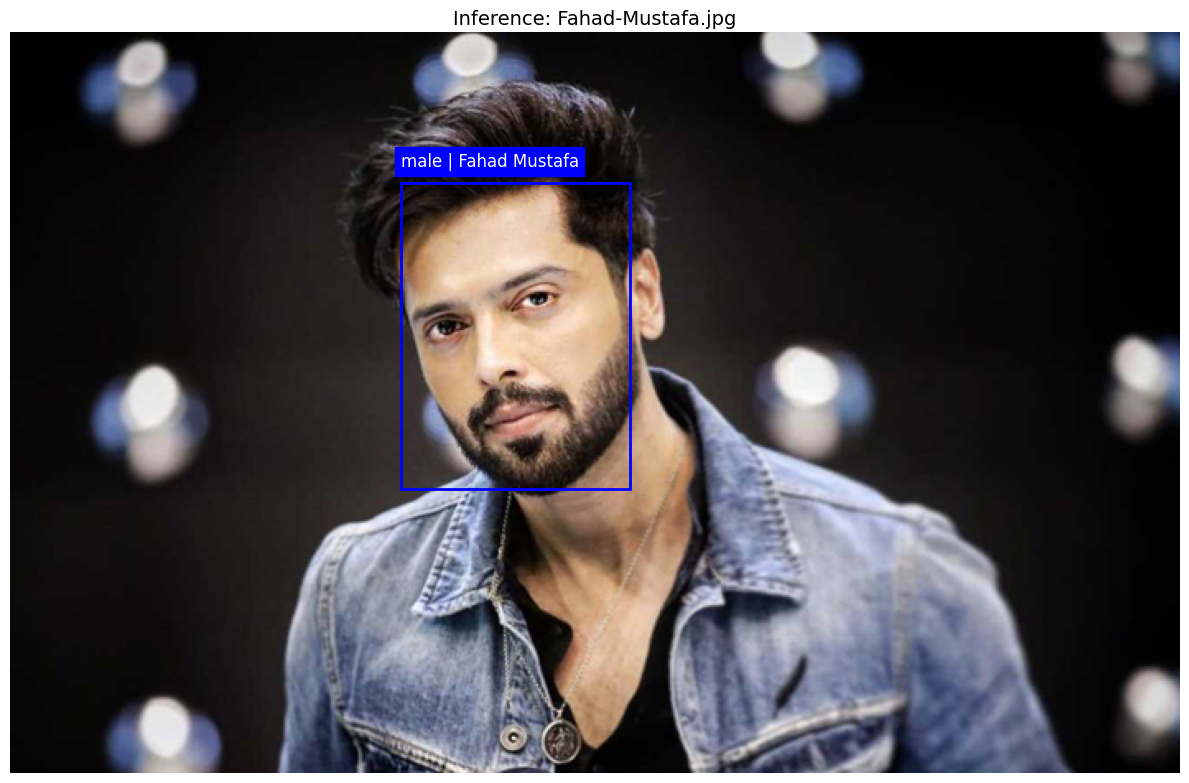

In [ ]:
if __name__ == "__main__":
    input_source = "/content/Fahad-Mustafa.jpg"

    image_paths = get_image_paths(input_source)
    for img_path in image_paths:
        print(f"Processing: {img_path}")
        process_image(img_path)

Processing: iqra.jpeg

image 1/1 /content/iqra.jpeg: 416x640 1 female, 146.0ms
Speed: 5.2ms preprocess, 146.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


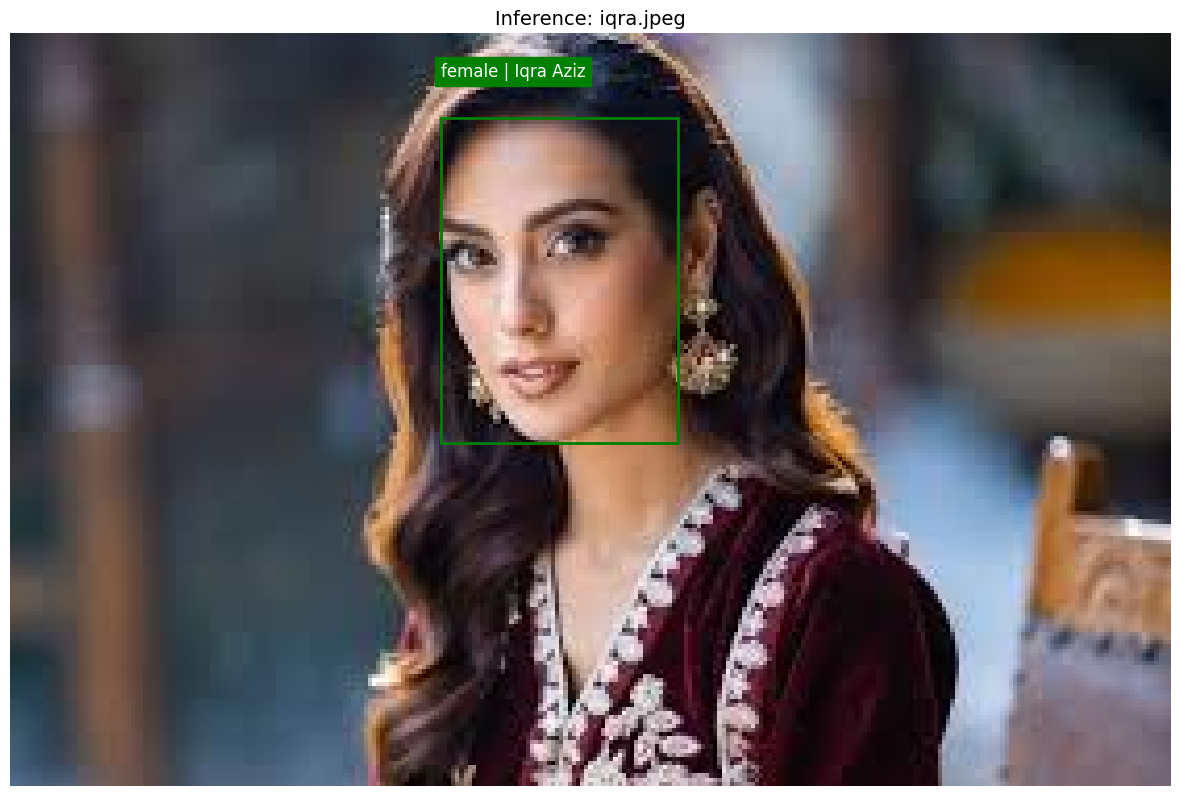

In [ ]:
if __name__ == "__main__":
    input_source = "iqra.jpeg"

    image_paths = get_image_paths(input_source)
    for img_path in image_paths:
        print(f"Processing: {img_path}")
        process_image(img_path)